In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/communicate-data-visua/url
/kaggle/input/pp3visualdata/url
/kaggle/input/datapvisu3/201902-fordgobike-tripdata.csv


In [2]:
#import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [3]:
#loading the dataset in the dataframe
df=pd.read_csv('../input/datapvisu3/201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#data overview using info funcation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


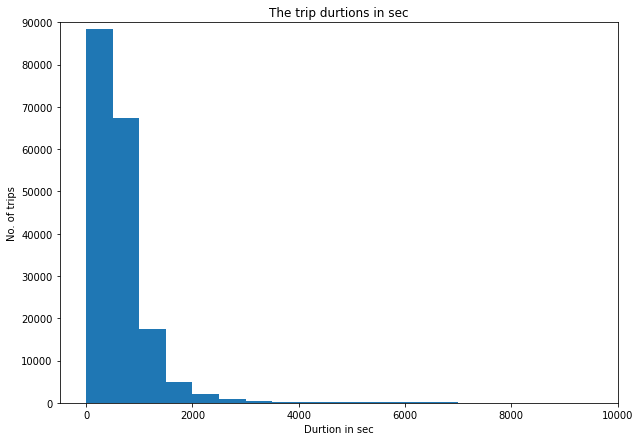

In [7]:
#investigate the distribuation of the duration_sec
binsize=500
bins =np.arange(0,df['duration_sec'].max()+binsize,binsize)
plt.figure(figsize=[10,7])
plt.hist(data=df,x ='duration_sec',bins = bins)
plt.title('The trip durtions in sec')
plt.xlabel('Durtion in sec')
plt.ylabel('No. of trips')
plt.axis([-500,10000,0,90000])
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


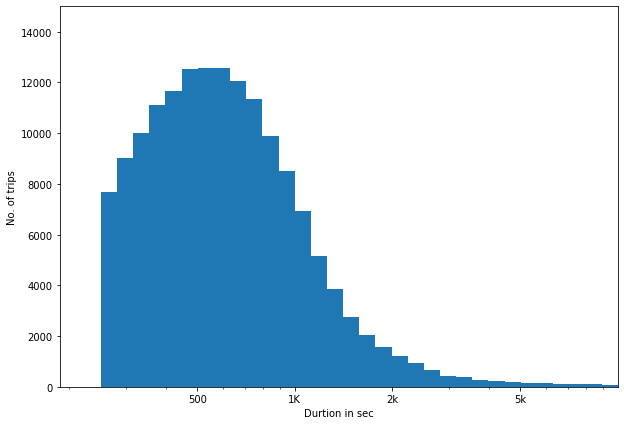

In [8]:
#insight the above distribuation in log scale to find the features easily
log_binsize = 0.05
bins_log = 10** np.arange(2.4,np.log10(df['duration_sec'].max())+log_binsize,log_binsize)

plt.figure(figsize=[10,7])
plt.hist(data = df,x = 'duration_sec',bins=bins_log)
plt.xlabel('Durtion in sec')
plt.xscale('log')
plt.ylabel('No. of trips')
plt.axis([0,10000,0,15000])
plt.xticks([500,1e3,2e3,5e3],[500,'1K','2k','5k'])
plt.show()

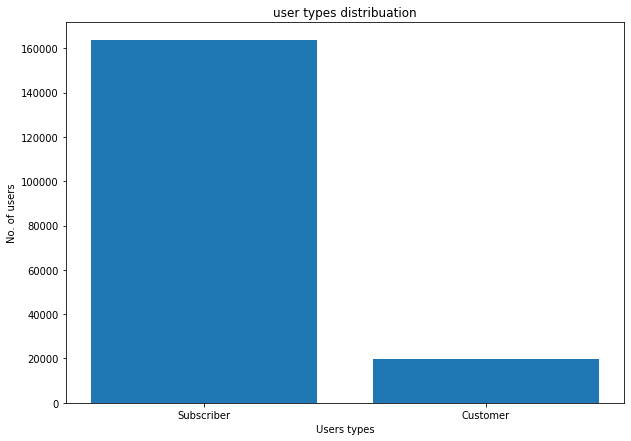

In [9]:
#investigate the distribuation of the users types
plt.figure(figsize=[10,7])
plt.bar(x =df.user_type.value_counts().keys(),height=df.user_type.value_counts())
plt.title('user types distribuation')
plt.xlabel('Users types')
plt.ylabel('No. of users')
plt.show()


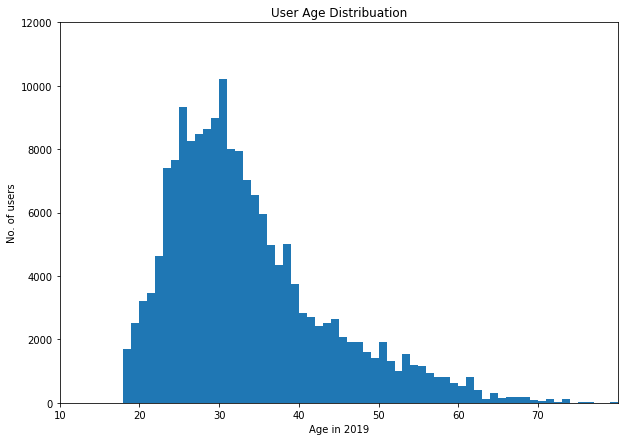

In [10]:
#study the distribuation of another variable related to the age of the members
binsize = 1
bins = np.arange(0,df['member_birth_year'].astype(float).max()+binsize,binsize)

plt.figure(figsize=[10,7])
plt.hist(data = df.dropna(),x = 'member_birth_year',bins=bins)
plt.title('User Age Distribuation')
plt.xlabel('Age in 2019')
plt.ylabel('No. of users')
plt.axis([1939,2009,0,12000])
#calulate the user age fom their birth year till 2019
plt.xticks([1949,1959,1969,1979,1989,1999,2009],[(70),(60),(50),(40),(30),(20),(10)])
plt.gca().invert_xaxis()
plt.show()

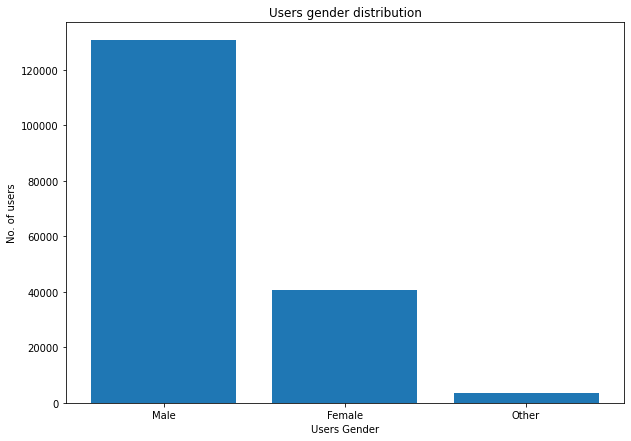

In [11]:
#investigate the effect of users gender by its distribuation
plt.figure(figsize=[10,7])
plt.bar(x =df.member_gender.value_counts().keys(),height=df.member_gender.value_counts())
plt.title('Users gender distribution')
plt.xlabel('Users Gender')
plt.ylabel('No. of users')
plt.show()


**Bivarite explortion:**

in this section,the analysis based on the relation between the trip duration and the other parameters which has investigated in perviouse sections individually such as;the user type,gender ,age,..etc.

**Bivarite explortion:**

in this section,the analysis based on the relation between the trip duration and the other parameters which has investigated in perviouse sections individually such as;the user type,gender ,age,..etc.

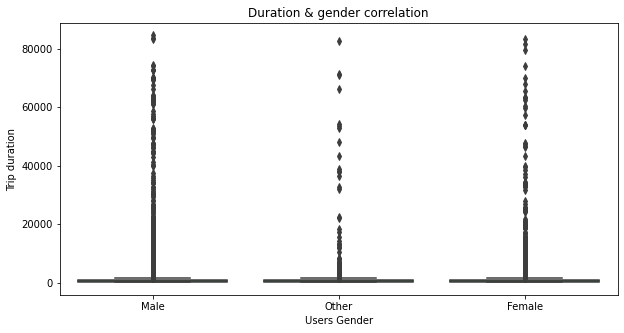

In [12]:
#investigate the effect of users gender on the trip duration
base_color=sb.color_palette()[2]
plt.figure(figsize=[10,5])
sb.boxplot(data = df, x='member_gender',y='duration_sec',color = base_color)
plt.title('Duration & gender correlation')
plt.xlabel('Users Gender')
plt.ylabel('Trip duration')
plt.show()


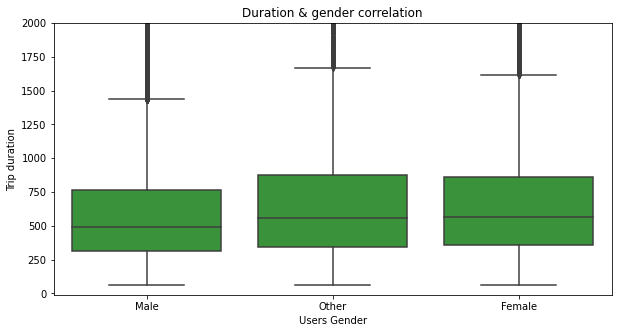

In [13]:
#to expand the chart in the croweded data region to obtain and extract the effect of users gender on the trip duration
base_color=sb.color_palette()[2]
plt.figure(figsize=[10,5])
sb.boxplot(data = df, x='member_gender',y='duration_sec',color = base_color)
plt.title('Duration & gender correlation')
plt.xlabel('Users Gender')
plt.ylabel('Trip duration')
plt.ylim([-10,2000])
plt.show()


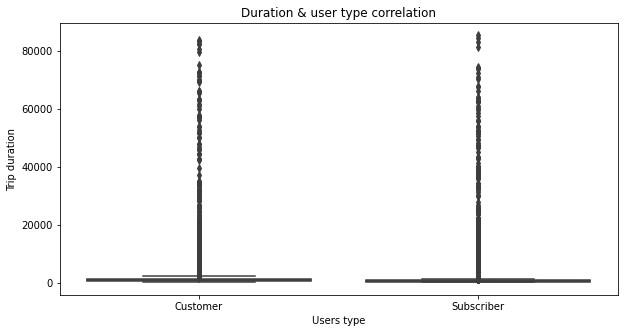

In [14]:
#obtaining the effect of users type on the trip duration
base_color=sb.color_palette()[2]
plt.figure(figsize=[10,5])
sb.boxplot(data = df, x='user_type',y='duration_sec',color = base_color)
plt.title('Duration & user type correlation')
plt.xlabel('Users type')
plt.ylabel('Trip duration')
plt.show()


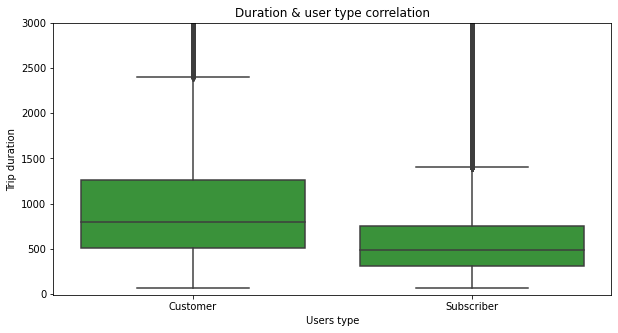

In [15]:
#to expand the chart in the croweded data region to obtain and extract the effect of users type on the trip duration
base_color=sb.color_palette()[2]
plt.figure(figsize=[10,5])
sb.boxplot(data = df, x='user_type',y='duration_sec',color = base_color)
plt.title('Duration & user type correlation')
plt.xlabel('Users type')
plt.ylabel('Trip duration')
plt.ylim([-10,3000])
plt.show()


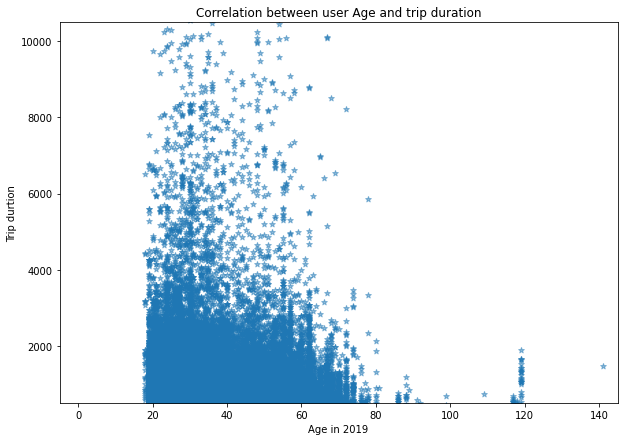

In [16]:
#study the corrlation between the age and the trip duration
plt.figure(figsize=[10,7])
plt.scatter((2019-df['member_birth_year']),df['duration_sec'],alpha=0.5, marker='*')
plt.title('Correlation between user Age and trip duration')
plt.xlabel('Age in 2019')
plt.ylabel('Trip durtion')
plt.axis([-5,145,500,10500])
plt.show()

[](http://)

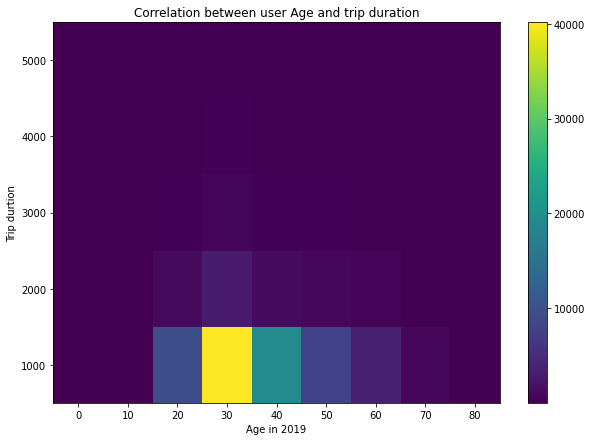

In [17]:
#Based on above plot ,the data are concentrated in certain region in age axis below 80and due to duration axis between 500 till 6000 so in this section i will drop off the less distribuation regions as folllowing:
plt.figure(figsize=[10,7])
bins_y=np.arange(500,6500,1000)
bins_x=np.arange(-5,86,10)
plt.hist2d((2019-df['member_birth_year']),df['duration_sec'],bins = [bins_x,bins_y])
plt.title('Correlation between user Age and trip duration')
plt.xlabel('Age in 2019')
plt.ylabel('Trip durtion')
plt.colorbar(ticks=[10000,20000,30000,40000]);
plt.show()

**Multivariate explortion:**

in this section,the analysis based on the relation between more than two  different  parameters at once; for example the depandence of trip duration on the relation between the gender of users  and their ages.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


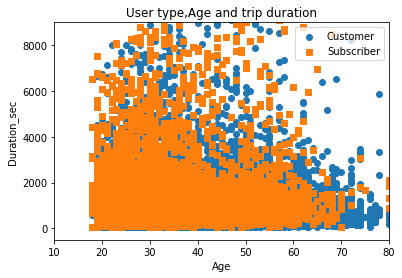

In [18]:
#in this sectioon , we will investigate the dependence of the trip duration on the relation between the  user's age and type
#give symbole of each user type
usertype_mark = [['Subscriber','o'],['Customer','s']]
#using for loop to extract or sabrate the effect od each user type
for utype, marker in usertype_mark:
    df_utype = df[df['user_type']==utype]
    plt.scatter((2019-df_utype['member_birth_year']),df_utype['duration_sec'],marker = marker,alpha = 1)
plt.legend(['Customer','Subscriber'])
plt.title('User type,Age and trip duration')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.axis([10,80,-500,9000])
plt.show()

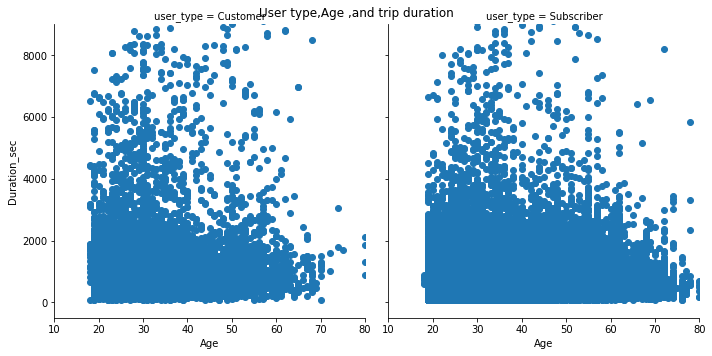

In [24]:
#in this section , we will seprate the user type effects on the trip duration due to the age 

df['age']=(2019-df['member_birth_year'])
user_type = sb.FacetGrid(data = df,col = 'user_type',col_wrap = 2,height = 5,
                                                                  xlim = [10,80],ylim= [-500,9000])
user_type.map(plt.scatter,'age','duration_sec',alpha=1)
user_type.fig.suptitle('User type,Age ,and trip duration')
user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
plt.show()

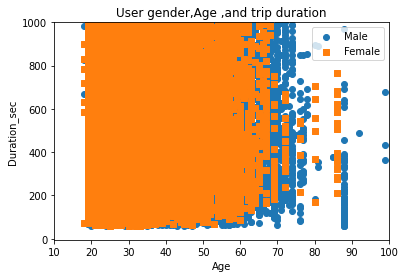

In [34]:
#in this sectioon , we will investigate the dependence of the trip duration on the relation between the  user's age and gender
#give symbole of each user type
gender_mark = [['Male','o'],['Female','s'],['other','v']]
#using for loop to extract or sabrate the effect of each user gender
for gender, marker in gender_mark:
    df_gender = df[df['member_gender']==gender]
    plt.scatter((2019-df_gender['member_birth_year']),df_gender['duration_sec'],marker = marker,alpha = 1)
plt.legend(['Male','Female'])
plt.axis([10,100,-5,1000])
plt.title('User gender,Age ,and trip duration')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

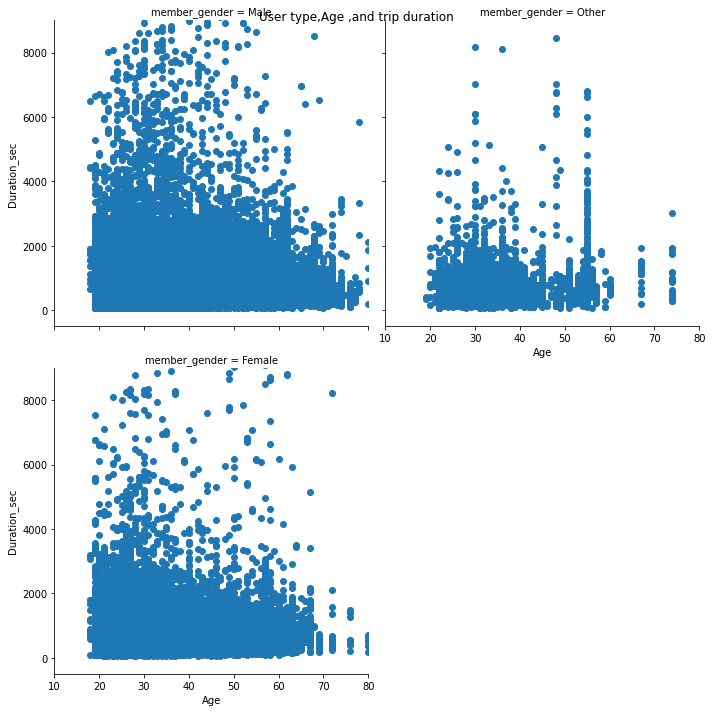

In [35]:
#in this section , we will seprate the user genders effects on the trip duration due to the age 

df['age']=(2019-df['member_birth_year'])
gender = sb.FacetGrid(data = df,col = 'member_gender',col_wrap = 2,height = 5,
                                                                  xlim = [10,80],ylim= [-500,9000])
gender.map(plt.scatter,'age','duration_sec',alpha=1)
gender.fig.suptitle('User type,Age ,and trip duration')
gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
plt.show()